Import methods 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
import xgboost as xgb

Read dataset CSV

In [2]:
energy = pd.read_csv("./energy_efficiency_data.csv")

Source: https://www.kaggle.com/datasets/ujjwalchowdhury/energy-efficiency-data-set?resource=download&select=energy_efficiency_data.csv

In [3]:
energy.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [4]:
energy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative_Compactness       768 non-null    float64
 1   Surface_Area               768 non-null    float64
 2   Wall_Area                  768 non-null    float64
 3   Roof_Area                  768 non-null    float64
 4   Overall_Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing_Area               768 non-null    float64
 7   Glazing_Area_Distribution  768 non-null    int64  
 8   Heating_Load               768 non-null    float64
 9   Cooling_Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


array([[<AxesSubplot:title={'center':'Relative_Compactness'}>,
        <AxesSubplot:title={'center':'Surface_Area'}>,
        <AxesSubplot:title={'center':'Wall_Area'}>],
       [<AxesSubplot:title={'center':'Roof_Area'}>,
        <AxesSubplot:title={'center':'Overall_Height'}>,
        <AxesSubplot:title={'center':'Orientation'}>],
       [<AxesSubplot:title={'center':'Glazing_Area'}>,
        <AxesSubplot:title={'center':'Glazing_Area_Distribution'}>,
        <AxesSubplot:title={'center':'Heating_Load'}>],
       [<AxesSubplot:title={'center':'Cooling_Load'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

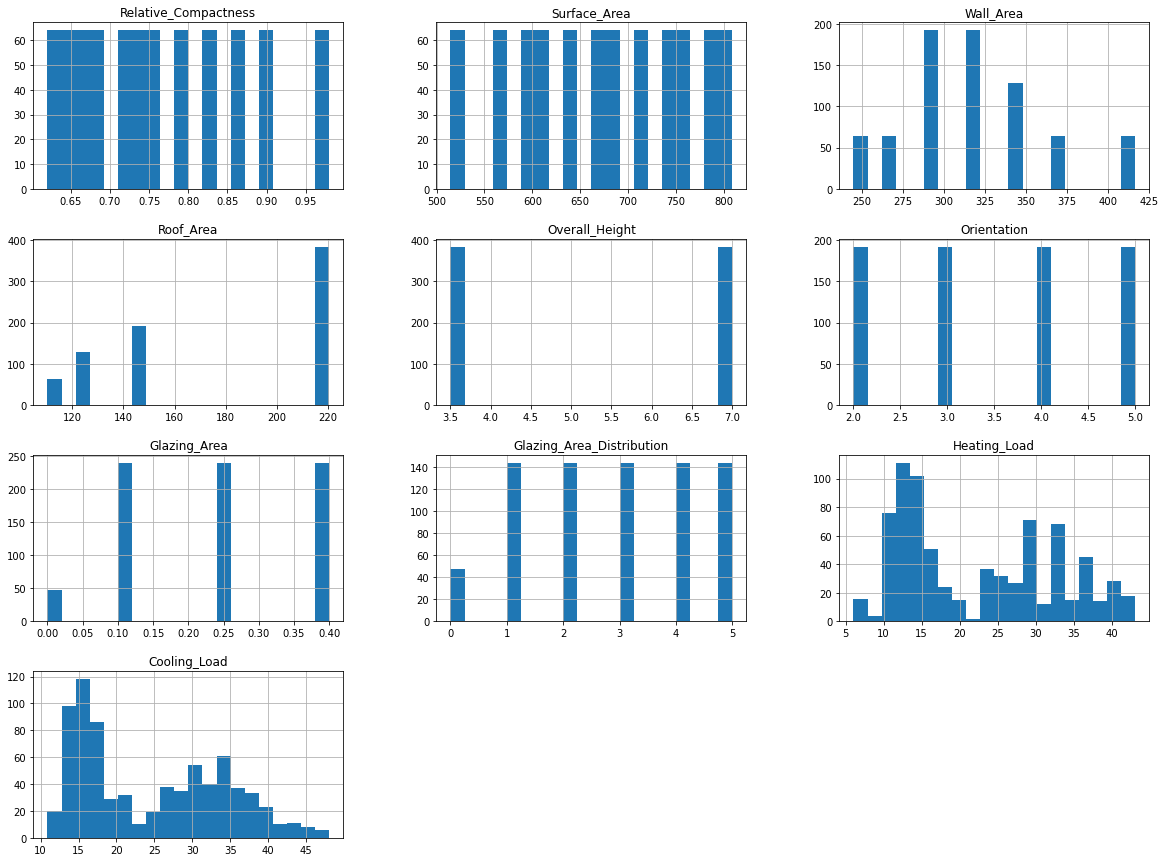

In [5]:
energy.hist(bins=20, figsize=(20,15))

Correlation between Cooling/Heating load and other parameters 

<AxesSubplot:>

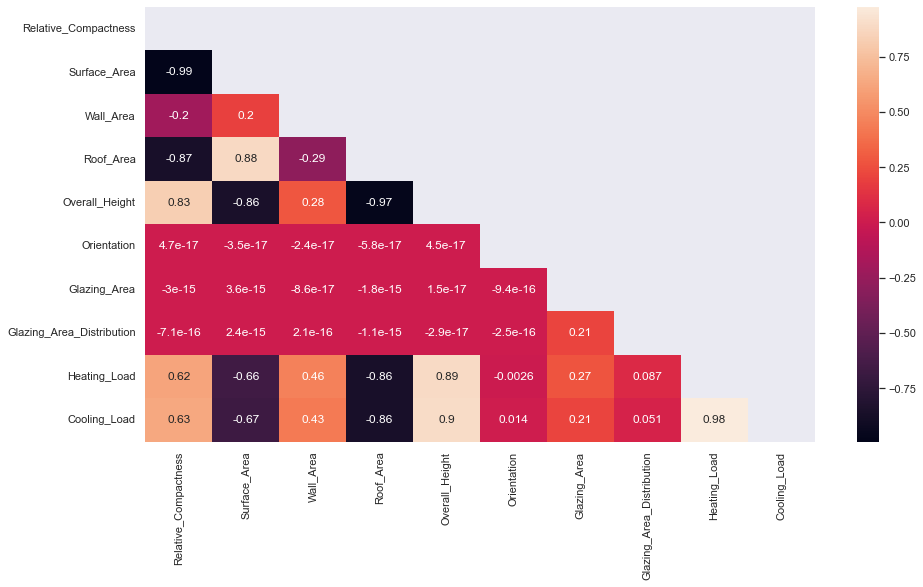

In [6]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(energy.corr(), annot=True, mask=np.triu(energy.corr()))

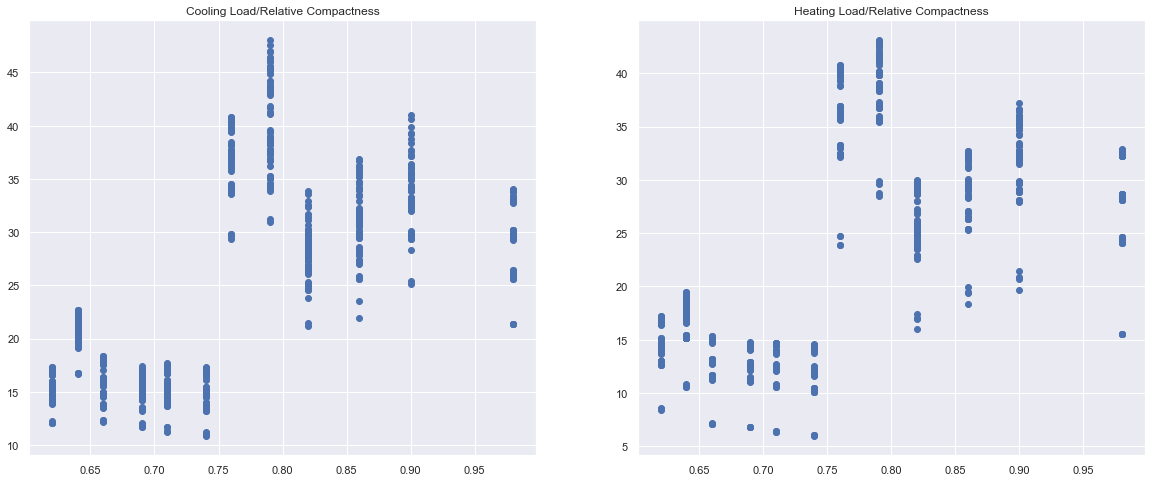

In [7]:
fig,axes = plt.subplots(1,2,figsize=(20,8)) 
axes[0].scatter(energy['Relative_Compactness'],energy['Cooling_Load'])
axes[0].title.set_text('Cooling Load/Relative Compactness')
axes[1].scatter(energy['Relative_Compactness'],energy['Heating_Load'])
axes[1].title.set_text('Heating Load/Relative Compactness')
#plt.savefig('Relative_Compactness.jpg')

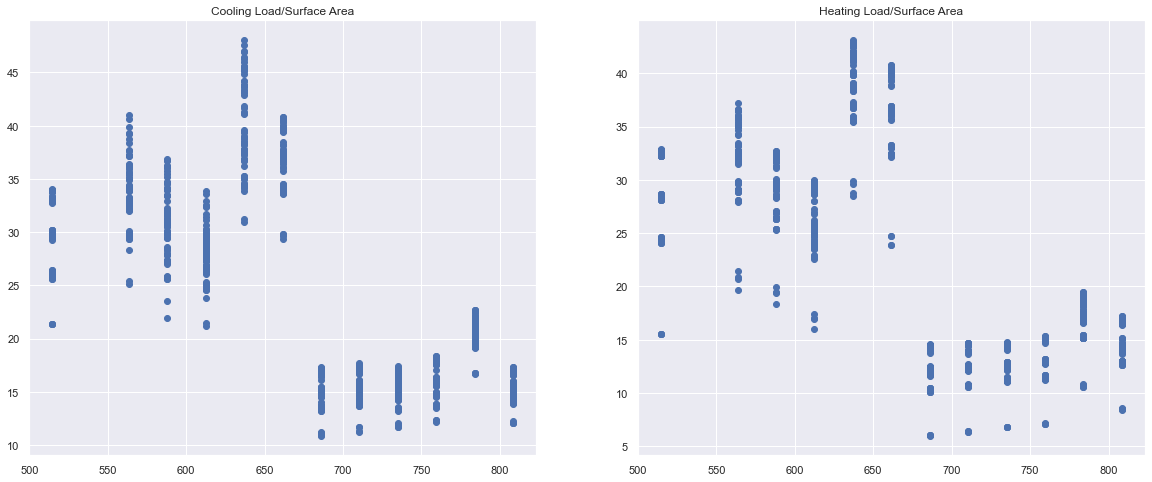

In [8]:
fig,axes = plt.subplots(1,2,figsize=(20,8)) 
axes[0].scatter(energy['Surface_Area'],energy['Cooling_Load'])
axes[0].title.set_text('Cooling Load/Surface Area')
axes[1].scatter(energy['Surface_Area'],energy['Heating_Load'])
axes[1].title.set_text('Heating Load/Surface Area')
#plt.savefig('Surface_Area.jpg')

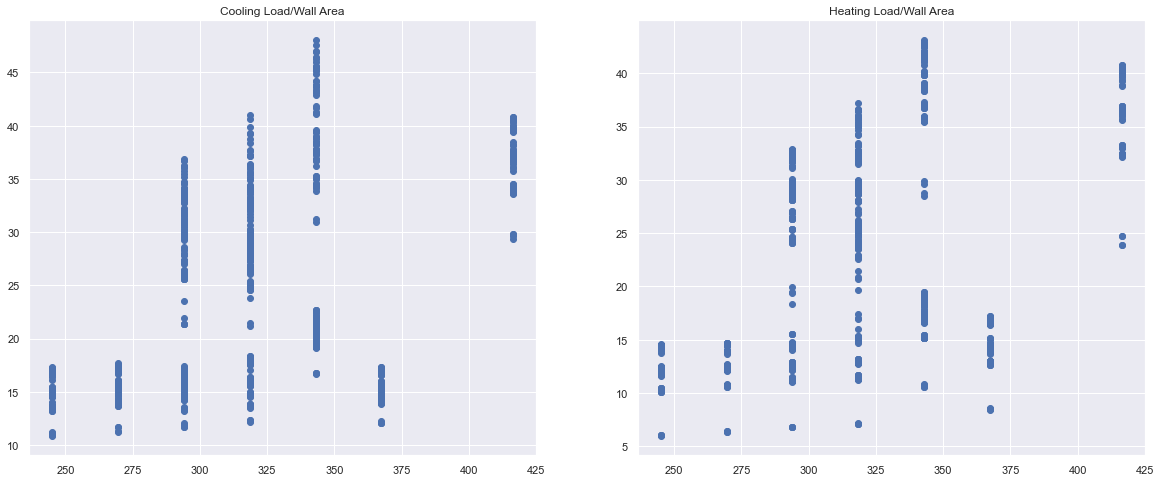

In [9]:
fig,axes = plt.subplots(1,2,figsize=(20,8)) 
axes[0].scatter(energy['Wall_Area'],energy['Cooling_Load'])
axes[0].title.set_text('Cooling Load/Wall Area')
axes[1].scatter(energy['Wall_Area'],energy['Heating_Load'])
axes[1].title.set_text('Heating Load/Wall Area')
#plt.savefig('Wall_Area.jpg')

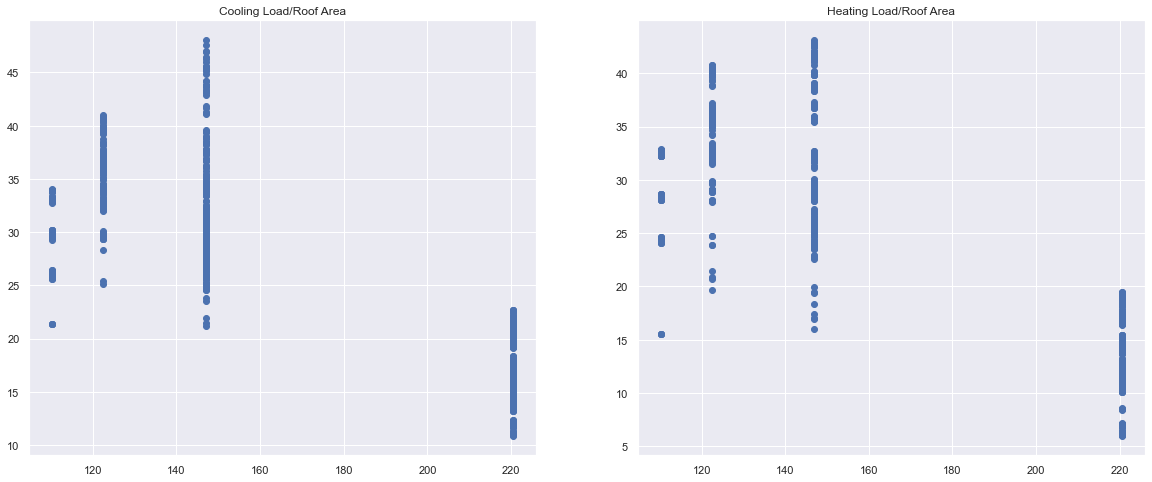

In [10]:
fig,axes = plt.subplots(1,2,figsize=(20,8)) 
axes[0].scatter(energy['Roof_Area'],energy['Cooling_Load'])
axes[0].title.set_text('Cooling Load/Roof Area')
axes[1].scatter(energy['Roof_Area'],energy['Heating_Load'])
axes[1].title.set_text('Heating Load/Roof Area')
#plt.savefig('Roof_Area.jpg')

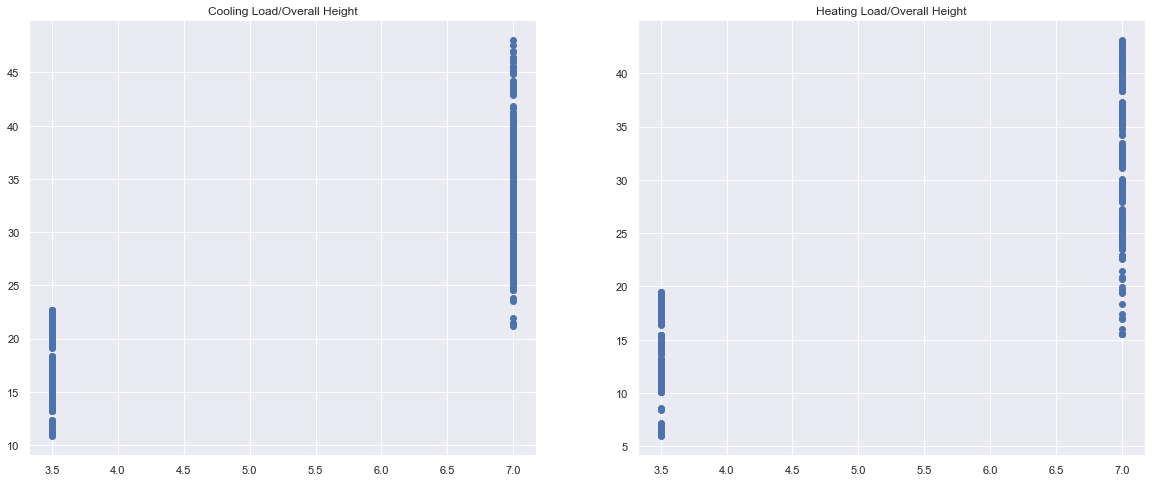

In [11]:
fig,axes = plt.subplots(1,2,figsize=(20,8)) 
axes[0].scatter(energy['Overall_Height'],energy['Cooling_Load'])
axes[0].title.set_text('Cooling Load/Overall Height')
axes[1].scatter(energy['Overall_Height'],energy['Heating_Load'])
axes[1].title.set_text('Heating Load/Overall Height')
#plt.savefig('Overall_Height.jpg')

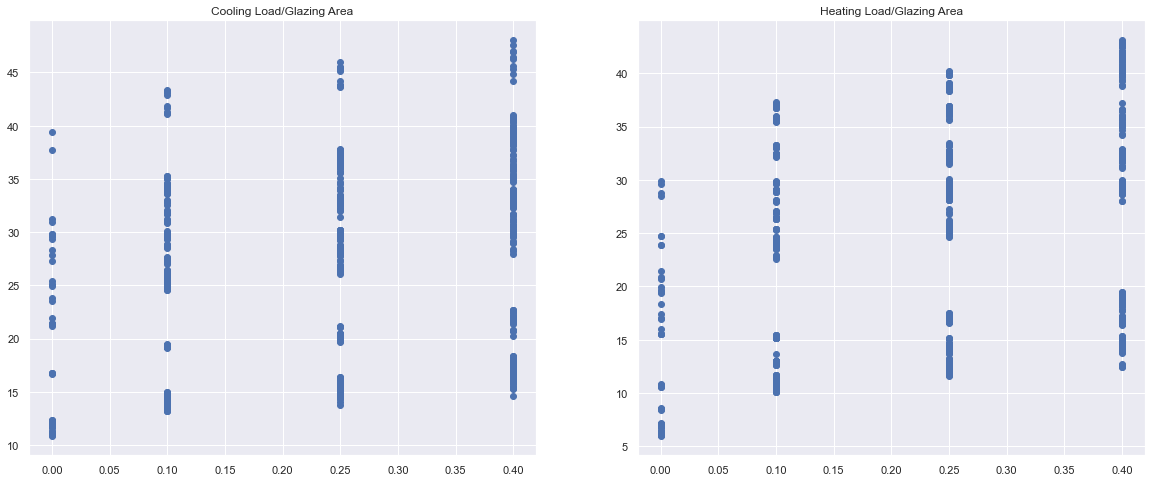

In [12]:
fig,axes = plt.subplots(1,2,figsize=(20,8)) 
axes[0].scatter(energy['Glazing_Area'],energy['Cooling_Load'])
axes[0].title.set_text('Cooling Load/Glazing Area')
axes[1].scatter(energy['Glazing_Area'],energy['Heating_Load'])
axes[1].title.set_text('Heating Load/Glazing Area')
#plt.savefig('Glazing_Area.jpg')

Handle column "Orientation" and "Glazing_Area_Distribution" labels

In [5]:
#For Orientation
Direction = {2:"North", 3:"East", 4:"South", 5:"West"}

#For Glazing_Area_Distribution
Glaze = {0:'Not Glazed', 1:"Uniform", 2:"Northward", 3:"Eastward", 4:"Southward", 5:"Westward"}

From: https://www.kaggle.com/code/winternguyen/modeling-energy-efficiency-residential-building/notebook

In [6]:
energy_factors = energy.copy()
energy_factors = energy_factors.replace({"Orientation": Direction})
energy_factors = energy_factors.replace({"Glazing_Area_Distribution": Glaze})

Save edited csv file for data visualization use

In [10]:
energy_vis = energy_factors.copy()
energy_vis["Relative_Compactness"] = (energy_vis["Relative_Compactness"]*100).astype('int')
energy_vis["Glazing_Area"] = (energy_vis["Glazing_Area"]*100).astype('int')
energy_vis["Storey"] = (energy_vis["Overall_Height"]/3.5).astype('int')
energy_vis = energy_vis.drop(["Overall_Height"], axis=1)
energy_vis.to_csv("energy_efficiency_edited.csv")
energy_vis.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load,Storey
0,98,514.5,294.0,110.25,North,0,Not Glazed,15.55,21.33,2
1,98,514.5,294.0,110.25,East,0,Not Glazed,15.55,21.33,2
2,98,514.5,294.0,110.25,South,0,Not Glazed,15.55,21.33,2
3,98,514.5,294.0,110.25,West,0,Not Glazed,15.55,21.33,2
4,90,563.5,318.5,122.50,North,0,Not Glazed,20.84,28.28,2


In [11]:
energy_factors = energy_factors.drop(["Cooling_Load", "Heating_Load"], axis=1)
energy_factors.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution
0,0.98,514.5,294.0,110.25,7.0,North,0.0,Not Glazed
1,0.98,514.5,294.0,110.25,7.0,East,0.0,Not Glazed
2,0.98,514.5,294.0,110.25,7.0,South,0.0,Not Glazed
3,0.98,514.5,294.0,110.25,7.0,West,0.0,Not Glazed
4,0.90,563.5,318.5,122.50,7.0,North,0.0,Not Glazed


In [12]:
energy_direction=pd.get_dummies(energy_factors['Orientation'])
energy_glazing=pd.get_dummies(energy_factors['Glazing_Area_Distribution']).drop('Not Glazed', axis=1)

Data classification

In [13]:
energy_x=pd.concat([energy_factors,energy_glazing,energy_direction],axis=1)
energy_x.drop(columns=["Orientation","Glazing_Area_Distribution"], inplace = True)
energy_x.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Glazing_Area,Eastward,Northward,Southward,Uniform,Westward,East,North,South,West
0,0.98,514.5,294.0,110.25,7.0,0.0,0,0,0,0,0,0,1,0,0
1,0.98,514.5,294.0,110.25,7.0,0.0,0,0,0,0,0,1,0,0,0
2,0.98,514.5,294.0,110.25,7.0,0.0,0,0,0,0,0,0,0,1,0
3,0.98,514.5,294.0,110.25,7.0,0.0,0,0,0,0,0,0,0,0,1
4,0.90,563.5,318.5,122.50,7.0,0.0,0,0,0,0,0,0,1,0,0


In [14]:
energy_ycool = energy["Cooling_Load"]
energy_ycool.head()

0    21.33
1    21.33
2    21.33
3    21.33
4    28.28
Name: Cooling_Load, dtype: float64

In [15]:
energy_yheat = energy["Heating_Load"]
energy_yheat.head()

0    15.55
1    15.55
2    15.55
3    15.55
4    20.84
Name: Heating_Load, dtype: float64

Spilt and transform data

In [16]:
X_train, X_test, yc_train, yc_test, yh_train, yh_test = train_test_split(energy_x, energy_ycool, energy_yheat, test_size=0.25)

In [17]:
print(f'Train data X size: {len(X_train)}\nTest data X size:{len(X_test)}')
print(f'Train data Y(Cooling) size: {len(yc_train)}\nTest data Y(Cooling) size: {len(yc_test)}')
print(f'Train data Y(Heating) size: {len(yh_train)}\nTest data Y(Heating) size: {len(yh_test)}')

Train data X size: 576
Test data X size:192
Train data Y(Cooling) size: 576
Test data Y(Cooling) size: 192
Train data Y(Heating) size: 576
Test data Y(Heating) size: 192


In [18]:
yc_train = np.array(yc_train).reshape(-1,1)
yc_test = np.array(yc_test).reshape(-1,1)
yh_train = np.array(yh_train).reshape(-1,1)
yh_test = np.array(yh_test).reshape(-1,1)

In [19]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
yc_train = sc.fit_transform(yc_train)
yc_test = sc.transform(yc_test)
yh_train = sc.fit_transform(yh_train)
yh_test = sc.transform(yh_test)

Build model with XG Boost Regressor

Cooling

In [20]:
CXGB = xgb.XGBRegressor()
CXGB.fit(X_train, yc_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [21]:
yc_pred = np.array(CXGB.predict(X_test)).reshape(-1,1)

In [22]:
r2c_score = CXGB.score(X_test,yc_test)
print(f'{r2c_score*100}%')

98.51856217190276%


In [23]:
print(f'Mean Absolute Error: {metrics.mean_absolute_error(yc_test, yc_pred)}')  
print(f'Mean Squared Error: {metrics.mean_squared_error(yc_test, yc_pred)}')  
print(f'Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(yc_test, yc_pred))}')

Mean Absolute Error: 0.07064996228063408
Mean Squared Error: 0.015159172688821942
Root Mean Squared Error: 0.12312259211380315


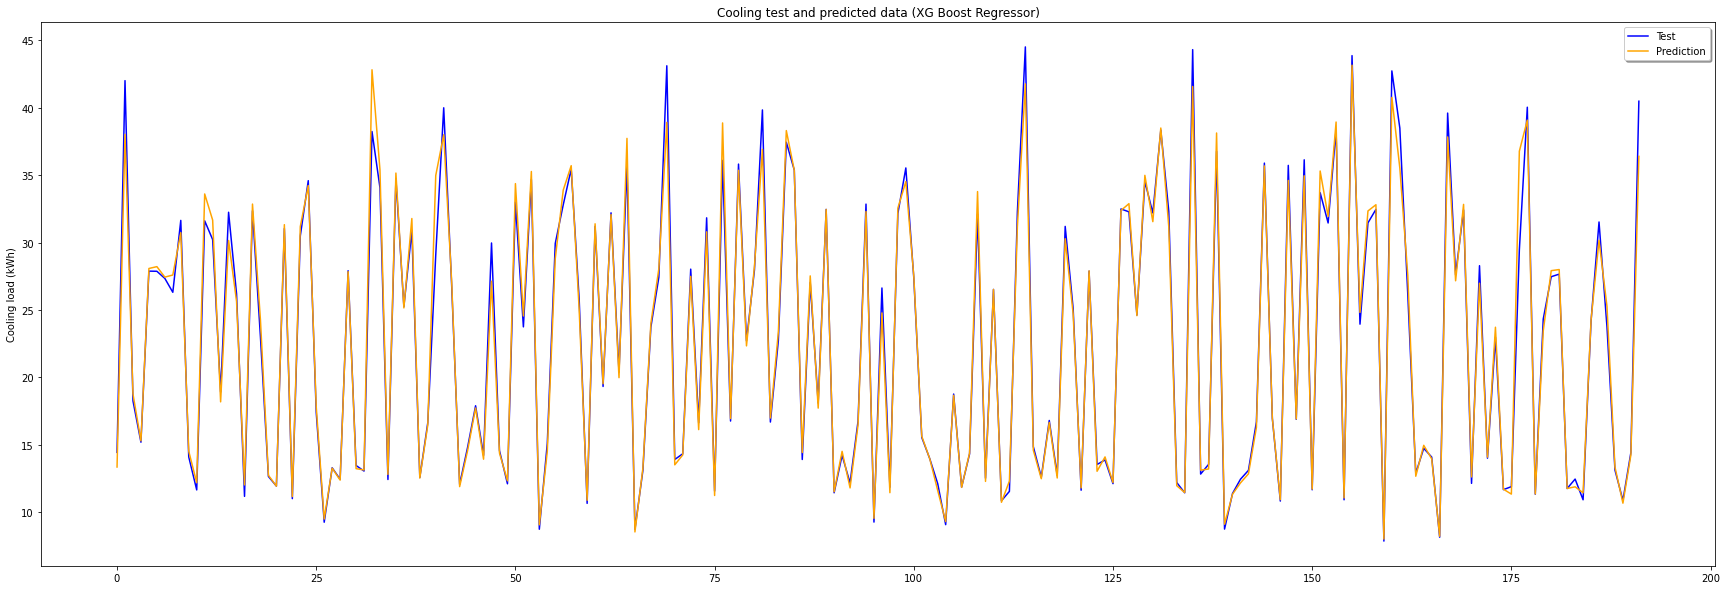

In [30]:
plt.figure(figsize=(30, 10))
plt.plot(sc.inverse_transform(yc_test), color='blue', label='Test')   
plt.plot(sc.inverse_transform(yc_pred), color='orange', label='Prediction')
plt.title("Cooling test and predicted data (XG Boost Regressor)")
plt.ylabel('Cooling load (kWh)')
plt.legend(loc='best', shadow=True)
plt.savefig('Cool_performance.jpg')
plt.show()

Heating

In [25]:
HXGB = xgb.XGBRegressor()
HXGB.fit(X_train, yh_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [26]:
yh_pred = np.array(HXGB.predict(X_test)).reshape(-1,1)

In [27]:
r2h_score = HXGB.score(X_test,yh_test)
print(f'{r2h_score*100}%')

99.82505792928691%


In [28]:
print(f'Mean Absolute Error: {metrics.mean_absolute_error(yh_test, yh_pred)}')  
print(f'Mean Squared Error: {metrics.mean_squared_error(yh_test, yh_pred)}')  
print(f'Root Mean Squared Error: {np.sqrt(metrics.mean_squared_error(yh_test, yh_pred))}')

Mean Absolute Error: 0.02999238941504229
Mean Squared Error: 0.0017997990903303271
Root Mean Squared Error: 0.042424039061955514


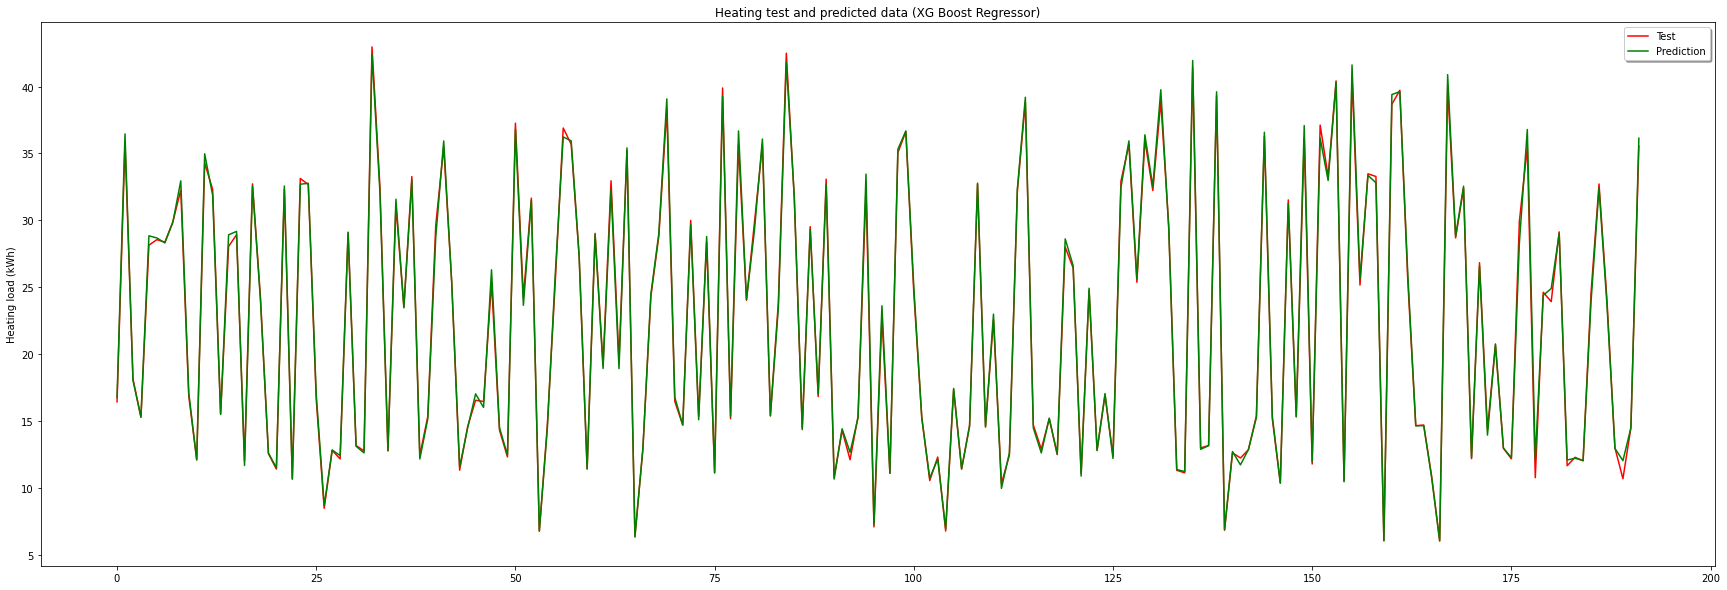

In [29]:
plt.figure(figsize=(30, 10))
plt.plot(sc.inverse_transform(yh_test), color='red', label='Test')   
plt.plot(sc.inverse_transform(yh_pred), color='green', label='Prediction')
plt.title("Heating test and predicted data (XG Boost Regressor)")
plt.ylabel('Heating load (kWh)')
plt.legend(loc='best', shadow=True)
#plt.savefig('Heat_performance.jpg')
plt.show()